In [5]:
import dolfin as dl
import matplotlib.pyplot as plt
import numpy as np

from spin.core import problem

In [2]:
mesh = dl.IntervalMesh(100, -1, 1)
settings = problem.SPINProblemSettings(
    mesh=mesh,
    pde_type="mean_exit_time",
    inference_type="drift_only",
    drift = ("-x[0]",),
    squared_diffusion = (("1.0",),)
)

In [3]:
builder = problem.SPINProblemBuilder(settings)
variational_problem = builder.build()

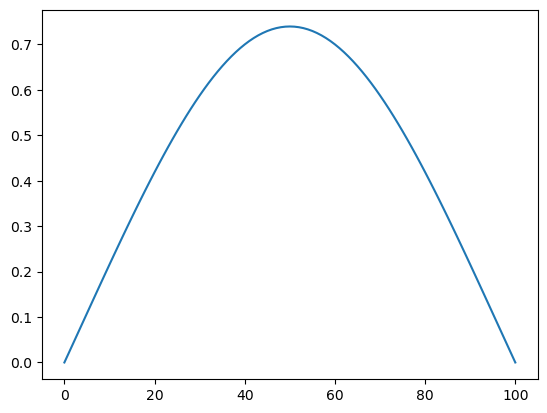

In [7]:
forward_vector = variational_problem.generate_state()
adjoint_vector = variational_problem.generate_state()
parameter_vector = variational_problem.generate_parameter()
parameter_vector.set_local(-np.linspace(-1, 1, parameter_vector.size()))
state_list = [forward_vector, parameter_vector, adjoint_vector]
variational_problem.solveFwd(forward_vector, state_list)

plt.plot(forward_vector.get_local())